## Import

In [1]:
import importlib
import os
import sys
from pathlib import Path
from typing import Dict, List, Literal, Optional, Tuple, Union

import IPython
import ipywidgets as widgets
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib.figure import Figure

notebook_path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
project_dir = notebook_path.parent.parent
sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
import src.visualization.validity_chain.SinglePlot as SinglePlot
from src.utils.Csv import Csv

os.chdir(project_dir)
log = custom_log.init_logger(log_lvl=10, start_msg=f"Start in {Path().cwd()}")

c:\Users\plaschkies\Documents\Py_Projects\aihiii


2024-01-08 15:13:26,919 MainProcess  - MainThread      INFO  Start in c:\Users\plaschkies\Documents\Py_Projects\aihiii || custom_log.py


In [2]:
# set matplotlib style
plot_style = r"reports\figures\dissertation.mplstyle"
plt.style.use(plot_style)
# set plt directory
f_types = ["png"]  # , "pdf", "svg"]
store_dir = Path("reports/figures/validity_chain")
store_dir /= notebook_path.stem

store_dir.mkdir(parents=True, exist_ok=True)
for file in store_dir.glob("*"):
    if file.suffix.strip(".") in f_types:
        file.unlink()


# f_name
def store(fig: Figure, region: str, case: Literal["Oblique Left", "Oblique Right"], side: Optional[int] = None):
    cs = "".join([c[0].upper() for c in case.split()])
    reg = region.upper()
    sd = {1: "DR", 3: "PA", None: ""}[side]

    for f_type in f_types:
        f_path = store_dir / f"{cs}_{sd}_{reg}.{f_type}"
        log.debug(f"Store {f_path}")
        fig.savefig(f_path)

In [3]:
# read report data
csv = Csv(csv_path=Path(r"Q:\Val_Chain_Sims\From_Reports") / "report_data.csv.zip", log=log, compress=True)
db_report: pd.DataFrame = csv.read()
db_report.replace({"CAE NHTSA": "CAE Report", "Test NHTSA": "Hardware Report"}, inplace=True)

display(db_report)

2024-01-08 15:13:26,969 MainProcess  - MainThread      DEBUG CSV file without suffix is Q:\Val_Chain_Sims\From_Reports\report_data, Compress True || Csv.py
2024-01-08 15:13:26,973 MainProcess  - MainThread      DEBUG CSV file is Q:\Val_Chain_Sims\From_Reports\report_data.csv.zip || Csv.py
2024-01-08 15:13:26,979 MainProcess  - MainThread      DEBUG Read Q:\Val_Chain_Sims\From_Reports\report_data.csv.zip || Csv.py


,Value,Time,Channel,Source,Case
0,-0.0454,1.0,00COG00000VH00ACXD,CAE Report,Full Frontal
1,0.2117,2.0,00COG00000VH00ACXD,CAE Report,Full Frontal
2,0.4767,3.0,00COG00000VH00ACXD,CAE Report,Full Frontal
3,0.6952,4.0,00COG00000VH00ACXD,CAE Report,Full Frontal
4,0.6031,5.0,00COG00000VH00ACXD,CAE Report,Full Frontal
...,...,...,...,...,...
16953,0.5883,135.0,00COG00000VH00ACRD,Hardware Report,Oblique Right
16954,0.4951,136.0,00COG00000VH00ACRD,Hardware Report,Oblique Right
16955,0.3824,137.0,00COG00000VH00ACRD,Hardware Report,Oblique Right
16956,0.2644,138.0,00COG00000VH00ACRD,Hardware Report,Oblique Right


In [4]:
# read CAE data
csv = Csv(csv_path=Path(r"Q:\Val_Chain_Sims\Honda_Accord_2014_Original_THOR_2_7") / "extracted.csv.zip", log=log, compress=True)
db_cae: pd.DataFrame = csv.read()
db_cae.replace({"Assemblies_1":"SP 48", "Assemblies_2":"DP 48", "Assemblies_3":"SP 96", "Assemblies_4":"DP 96"}, inplace=True)
display(db_cae)

2024-01-08 15:13:27,060 MainProcess  - MainThread      DEBUG CSV file without suffix is Q:\Val_Chain_Sims\Honda_Accord_2014_Original_THOR_2_7\extracted, Compress True || Csv.py
2024-01-08 15:13:27,065 MainProcess  - MainThread      DEBUG CSV file is Q:\Val_Chain_Sims\Honda_Accord_2014_Original_THOR_2_7\extracted.csv.zip || Csv.py
2024-01-08 15:13:27,070 MainProcess  - MainThread      DEBUG Read Q:\Val_Chain_Sims\Honda_Accord_2014_Original_THOR_2_7\extracted.csv.zip || Csv.py


,Time,Value,Channel,Source,Assembly,Configuration,Case,Side
0,0.0,0.0000,00COG00000VH00VEXD,CAE THI,SP 48,Honda_Accord_2014_Original_THOR_2_7,Oblique Left,NaN
1,0.1,0.0037,00COG00000VH00VEXD,CAE THI,SP 48,Honda_Accord_2014_Original_THOR_2_7,Oblique Left,NaN
2,0.2,0.0036,00COG00000VH00VEXD,CAE THI,SP 48,Honda_Accord_2014_Original_THOR_2_7,Oblique Left,NaN
3,0.3,0.0034,00COG00000VH00VEXD,CAE THI,SP 48,Honda_Accord_2014_Original_THOR_2_7,Oblique Left,NaN
4,0.4,0.0033,00COG00000VH00VEXD,CAE THI,SP 48,Honda_Accord_2014_Original_THOR_2_7,Oblique Left,NaN
...,...,...,...,...,...,...,...,...
2353675,139.6,14.6643,00COG00000VH00VERB,CAE THI,DP 96,Honda_Accord_2014_Original_THOR_2_7,Oblique Right,NaN
2353676,139.7,14.6643,00COG00000VH00VERB,CAE THI,DP 96,Honda_Accord_2014_Original_THOR_2_7,Oblique Right,NaN
2353677,139.8,14.6643,00COG00000VH00VERB,CAE THI,DP 96,Honda_Accord_2014_Original_THOR_2_7,Oblique Right,NaN
2353678,139.9,14.6644,00COG00000VH00VERB,CAE THI,DP 96,Honda_Accord_2014_Original_THOR_2_7,Oblique Right,NaN


In [5]:
db_cae["Channel"].unique()

array(['00COG00000VH00VEXD', '00COG00000VH00VEYD', '00COG00000VH00ACYD',
       '00COG00000VH00ACXD', '01BELTB000TH50DSRD', '01BELTB000TH50FORD',
       '01BELTB300TH50FORD', '01BELTB400TH50FORD', '01BELTB500TH50FORD',
       '01BELTB600TH50FORD', '01FEMRLE00TH50FORD', '01FEMRRI00TH50FORD',
       '01HEAD0000TH50ACXD', '01HEAD0000TH50ACYD', '01HEAD0000TH50ACZD',
       '01HEAD0000TH50DSXD', '01HEAD0000TH50DSYD', '01HEAD0000TH50DSZD',
       '01CHST0000TH50ACXD', '01CHST0000TH50ACYD', '01CHST0000TH50ACZD',
       '01CHST0000TH50DSXD', '01CHST0000TH50DSYD', '01CHST0000TH50DSZD',
       '01PELV0000TH50ACXD', '01PELV0000TH50ACYD', '01PELV0000TH50ACZD',
       '01PELV0000TH50DSXD', '01PELV0000TH50DSYD', '01PELV0000TH50DSZD',
       '03BELTB000TH50DSRD', '03BELTB000TH50FORD', '03BELTB300TH50FORD',
       '03BELTB400TH50FORD', '03BELTB500TH50FORD', '03BELTB600TH50FORD',
       '03FEMRLE00TH50FORD', '03FEMRRI00TH50FORD', '03HEAD0000TH50ACXD',
       '03HEAD0000TH50ACYD', '03HEAD0000TH50ACZD', 

## Plotting

In [6]:
boundary_channels = [
    ["00COG00000VH00VEXD", "00COG00000VH00VEYD"],
    ["00COG00000VH00ACXD", "00COG00000VH00ACYD"],
    ["01BELTB300TH50FORD", "03BELTB300TH50FORD"],
]

occupant_channels = {}
for side in [1, 3]:
    occupant_channels[side] = [
        [f"{side:02d}HEAD0000TH50ACRD", f"{side:02d}HEAD0000TH50ACXD"],
        [f"{side:02d}HEAD0000TH50ACZD", f"{side:02d}HEAD0000TH50ACYD"],
        [f"{side:02d}PELV0000TH50ACRD", f"{side:02d}PELV0000TH50ACXD"],
        [f"{side:02d}PELV0000TH50ACYD", f"{side:02d}PELV0000TH50ACZD"],
        [f"{side:02d}FEMRLE00TH50FORD", f"{side:02d}FEMRRI00TH50FORD"],
    ]

#assemblies = {48:["Assemblies_1", "Assemblies_2"], 96:["Assemblies_3", "Assemblies_4"]}

units = {"FO": "Force [kN]", "AC": "Acceleration [g]", "VE": "Velocity [m/s]"}
lss = ["-",":"]
cs_report = ["black", "blue"]
cs = ["#FF0000", "#FF5C00", "#FFB900", "#E7FF00"]

c:\Temp\ipykernel_16220\238090132.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cae["Value"] *= flip
2024-01-08 15:18:05,218 MainProcess  - MainThread      DEBUG Store reports\figures\validity_chain\051_Eval_ValChain_Report_vs_THOR\OR__VEH.png || 3799450438.py
2024-01-08 15:18:10,359 MainProcess  - MainThread      DEBUG Store reports\figures\validity_chain\051_Eval_ValChain_Report_vs_THOR\OL__VEH.png || 3799450438.py


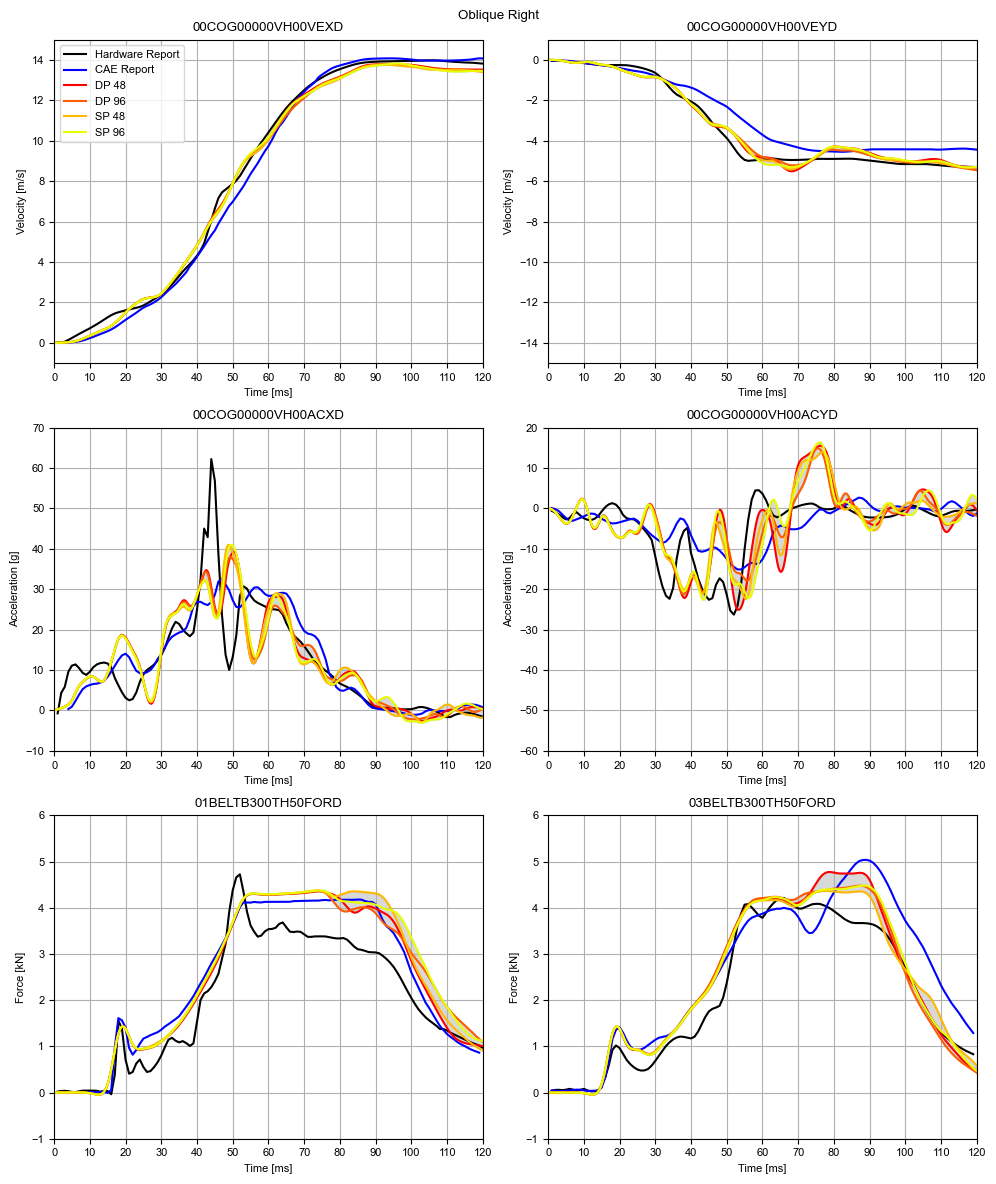

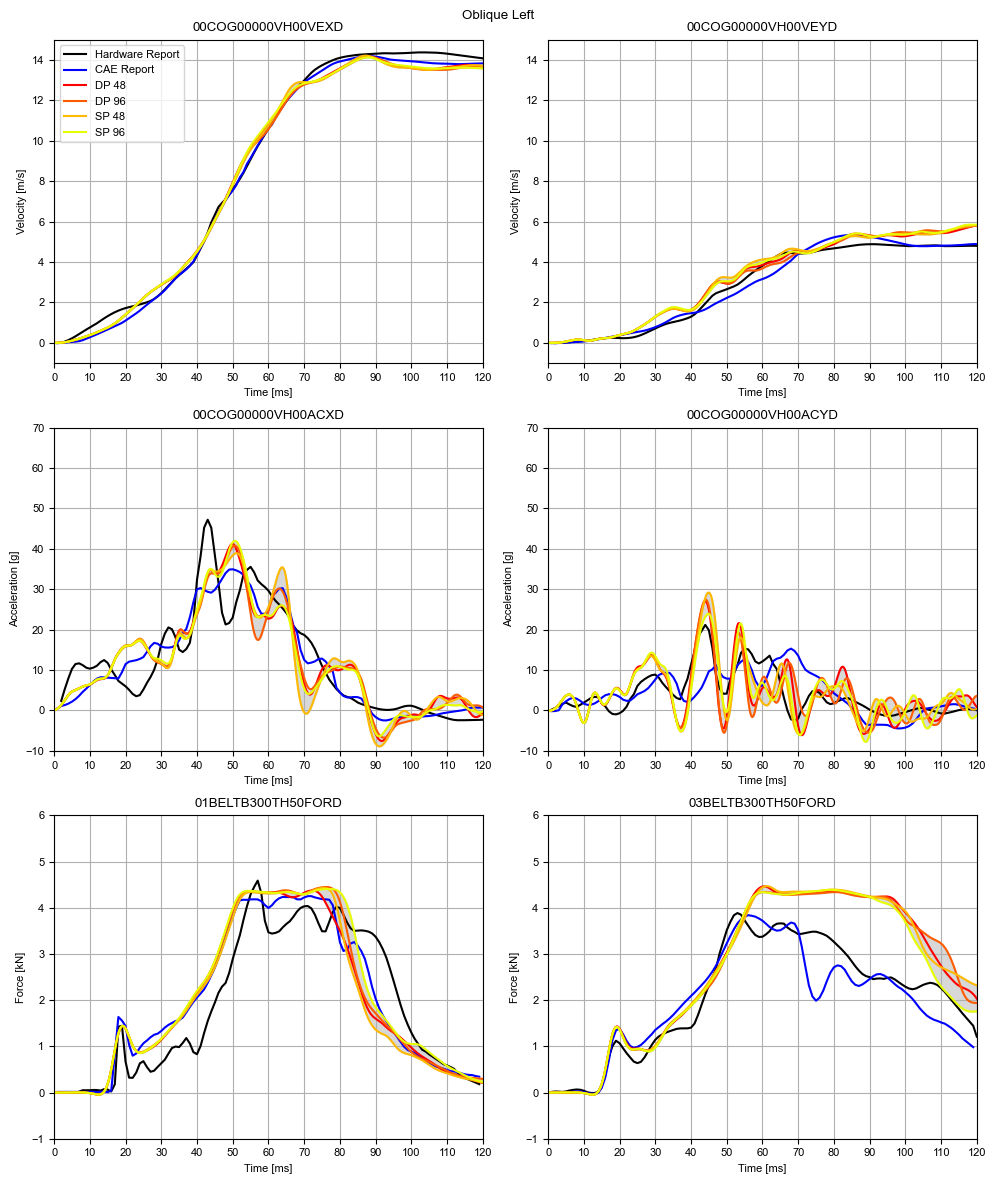

In [11]:
for case in ["Oblique Right", "Oblique Left"]:
    fig, axs = plt.subplot_mosaic(boundary_channels, figsize=(10, 12))
    fig.suptitle(case)
    for channel in axs.keys():
        # add report data
        report = db_report[db_report["Channel"].eq(channel) & db_report["Case"].eq(case)]
        for i, ass in enumerate(["Hardware Report", "CAE Report"]):
            report2 = report[report["Source"].eq(ass)]
            flip = (
                -1
                if (channel == "00COG00000VH00VEXD")
                or (channel == "00COG00000VH00ACXD")
                or (channel == "00COG00000VH00VEYD" and case == "Oblique Left")
                or (channel == "00COG00000VH00ACYD" and case == "Oblique Right")
                else 1
            )

            axs[channel].plot(report2["Time"], report2["Value"] * flip, label=ass, c=cs_report[i])

        # determine cae flip
        flip = (
            -1
            if (channel == "00COG00000VH00VEXD")
            or (channel == "00COG00000VH00ACXD")
            or (channel == "00COG00000VH00VEYD" and case == "Oblique Left")
            or (channel == "00COG00000VH00VEYD" and case == "Oblique Right")
            or (channel == "00COG00000VH00ACYD" and case == "Oblique Right")
            or (channel == "00COG00000VH00ACYD" and case == "Oblique Left")
            else 1
        )

        # filter CAE data
        cae = db_cae[db_cae["Channel"].eq(channel) & db_cae["Case"].eq(case)]
        cae["Value"] *= flip

        # plot single curves
        for i, setting in enumerate(sorted(cae["Assembly"].unique())):
            cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
            axs[channel].plot(cae2["Time"], cae2["Value"], label=setting, c=cs[i])

        # min max corridor
        time = sorted(cae["Time"].unique())
        mini = [cae["Value"][cae["Time"].eq(t)].min() for t in time]
        maxi = [cae["Value"][cae["Time"].eq(t)].max() for t in time]
        axs[channel].fill_between(time, mini, maxi, color="gray", alpha=0.3)

        # format
        axs[channel].set_xlim([0, 120])
        axs[channel].set_xticks(np.arange(0, 121, 10))
        if "VEX" in channel:
            axs[channel].set_ylim([-1, 15])
        elif "VEY" in channel:
            if case == "Oblique Right":
                axs[channel].set_ylim([-15, 1])
            else:
                axs[channel].set_ylim([-1, 15])
        elif "ACX" in channel:
            axs[channel].set_ylim([-10, 70])
        elif "ACY" in channel:
            if case == "Oblique Right":
                axs[channel].set_ylim([-60, 20])
            else:
                axs[channel].set_ylim([-10, 70])
        elif "BELT" in channel:
            axs[channel].set_ylim([-1, 6])
        axs[channel].set_title(channel)
        axs[channel].set_xlabel("Time [ms]")
        axs[channel].set_ylabel(units[channel[-4:-2]])
        axs[channel].grid()
        axs[boundary_channels[0][0]].legend()

    store(fig=fig, region="VEH", case=case)

c:\Temp\ipykernel_16220\4214266499.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cae["Value"] *= flip
2024-01-08 15:13:52,737 MainProcess  - MainThread      DEBUG Store reports\figures\validity_chain\051_Eval_ValChain_Report_vs_THOR\OR_DR_BODY.png || 3799450438.py
2024-01-08 15:14:00,990 MainProcess  - MainThread      DEBUG Store reports\figures\validity_chain\051_Eval_ValChain_Report_vs_THOR\OL_DR_BODY.png || 3799450438.py
2024-01-08 15:14:09,420 MainProcess  - MainThread      DEBUG Store reports\figures\validity_chain\051_Eval_ValChain_Report_vs_THOR\OR_PA_BODY.png || 3799450438.py
2024-01-08 15:14:17,797 MainProcess  - MainThread      DEBUG Store reports\figures\validity_chain\051_Eval_ValChain_Report_vs_THOR\OL_PA_BODY.png || 379945043

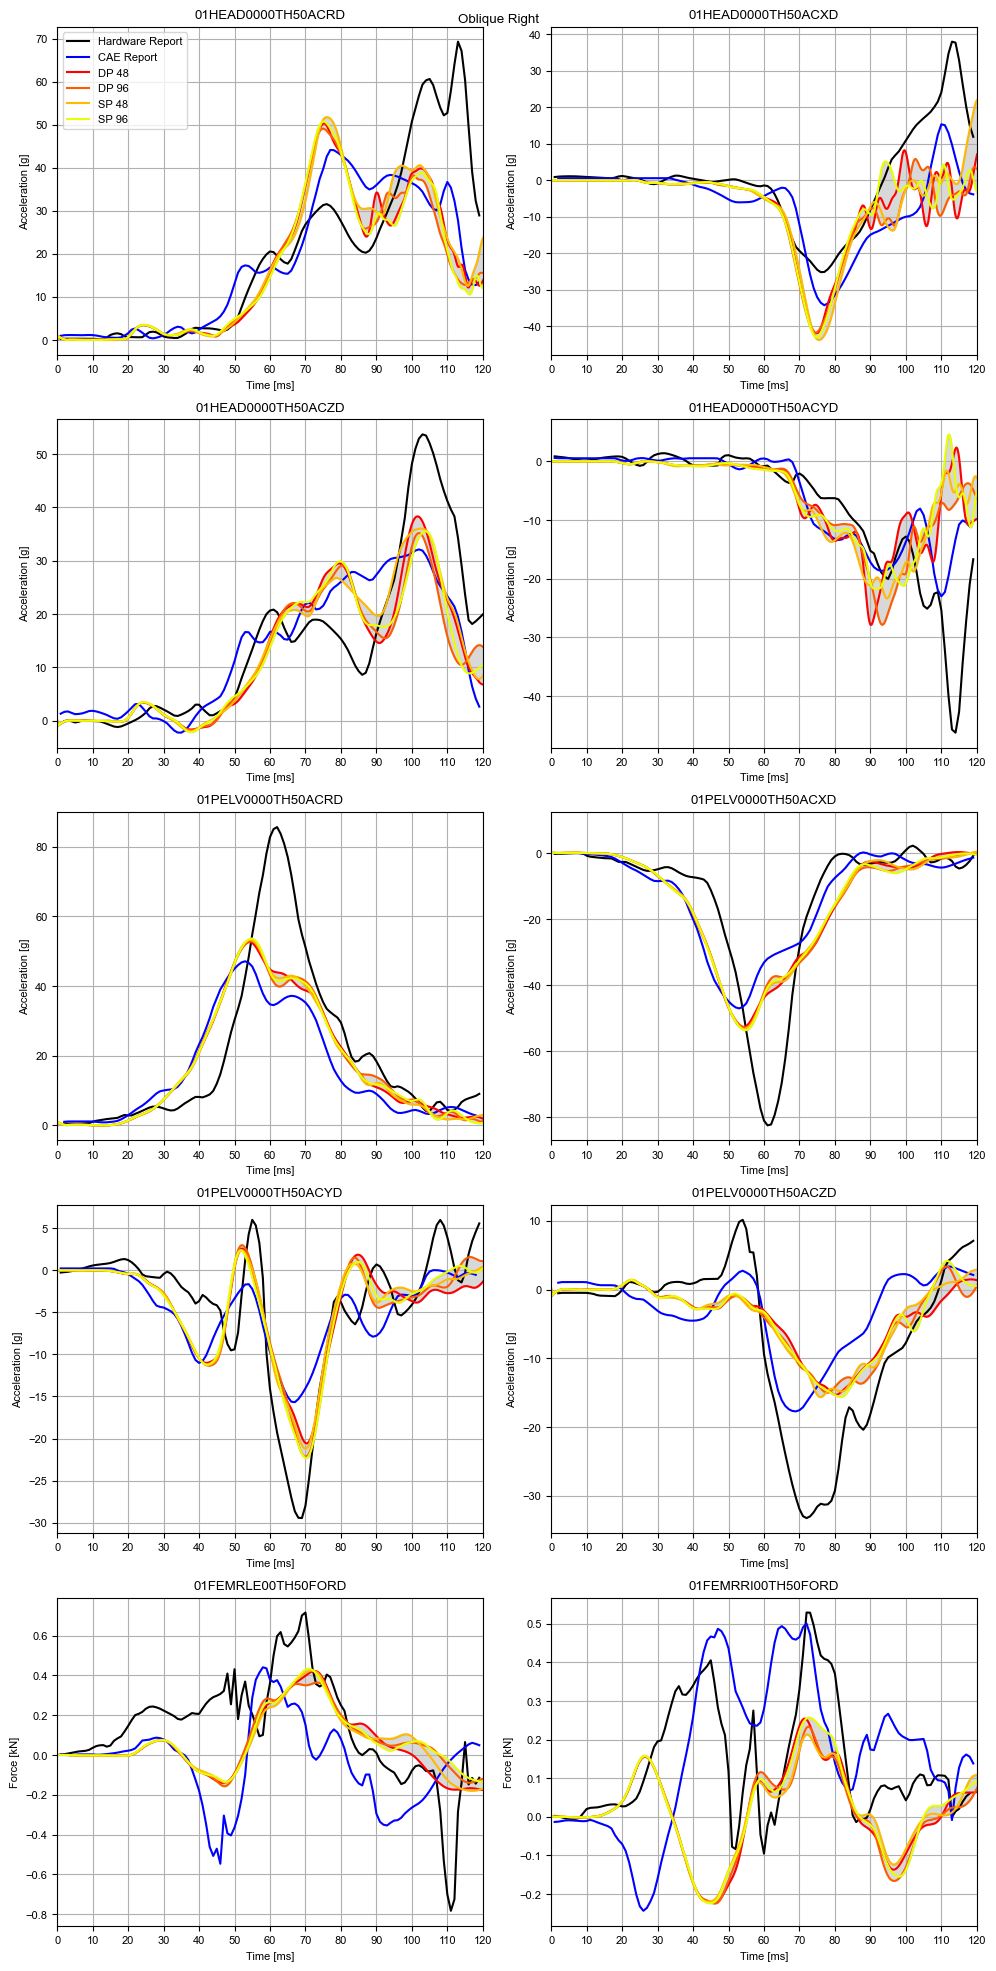

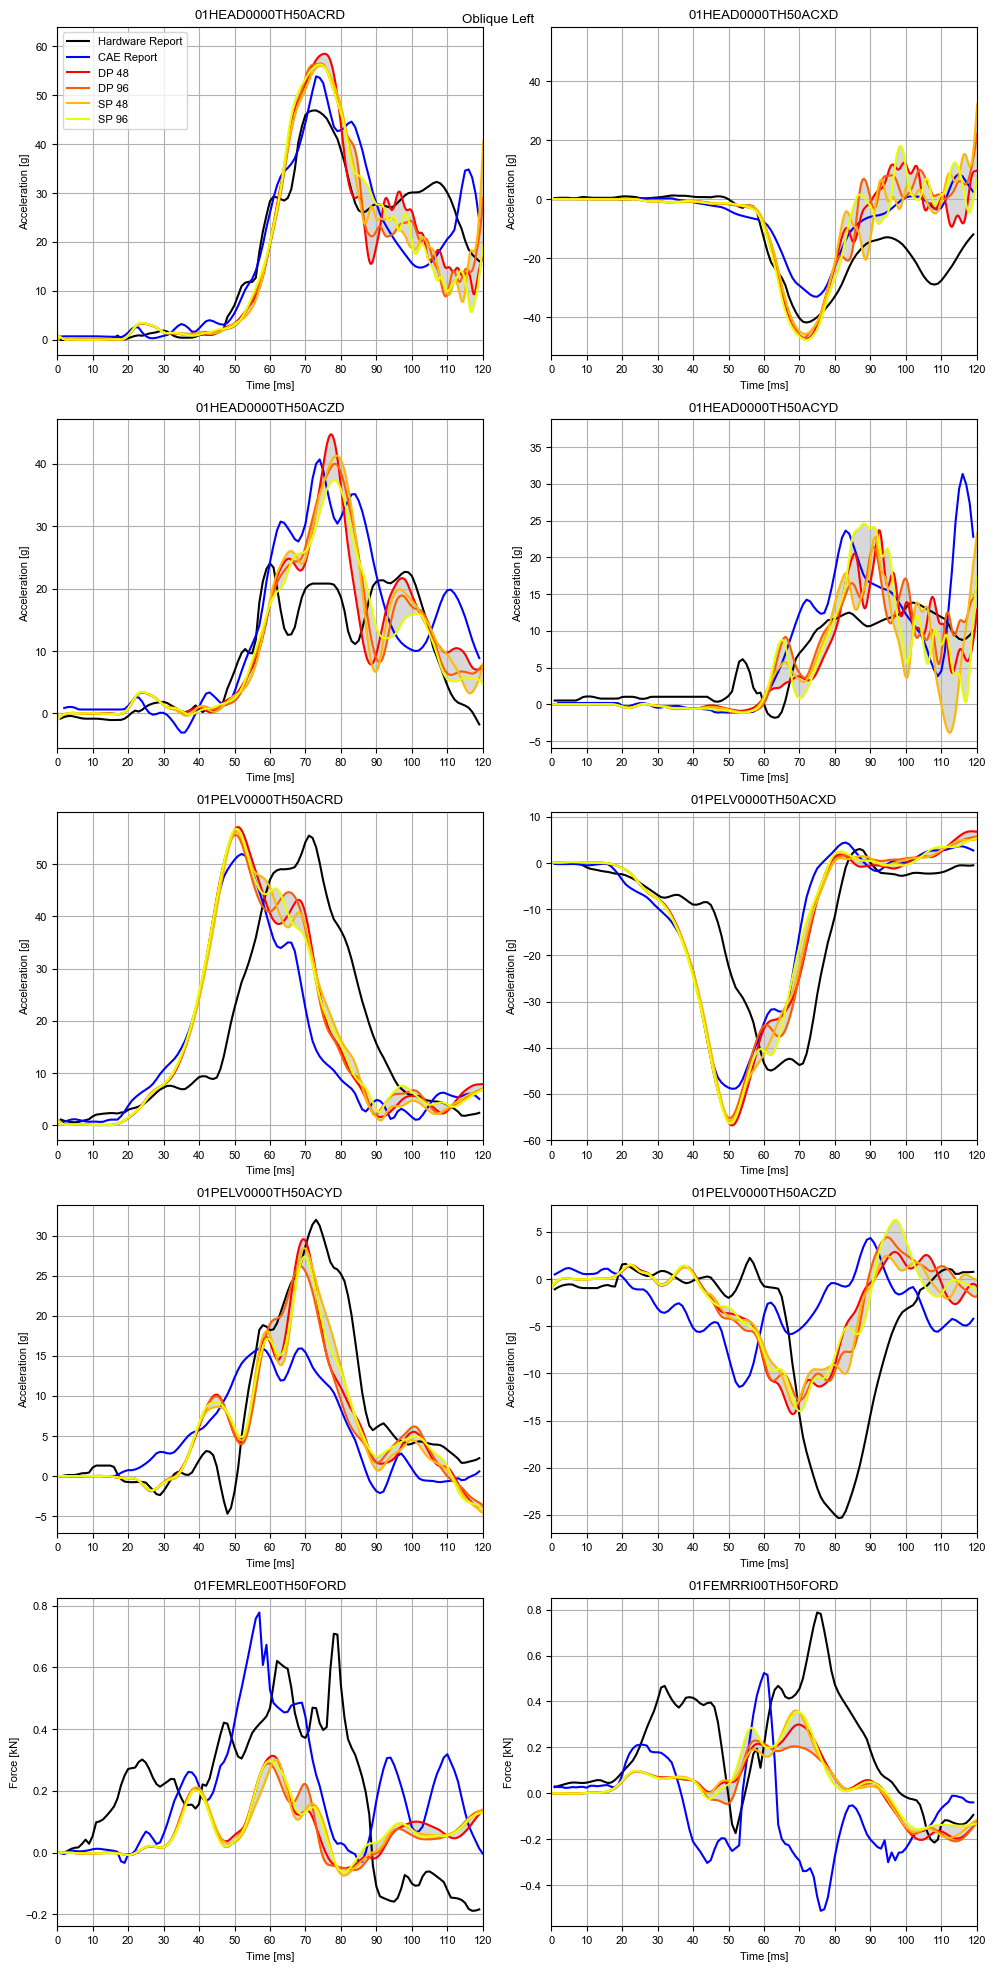

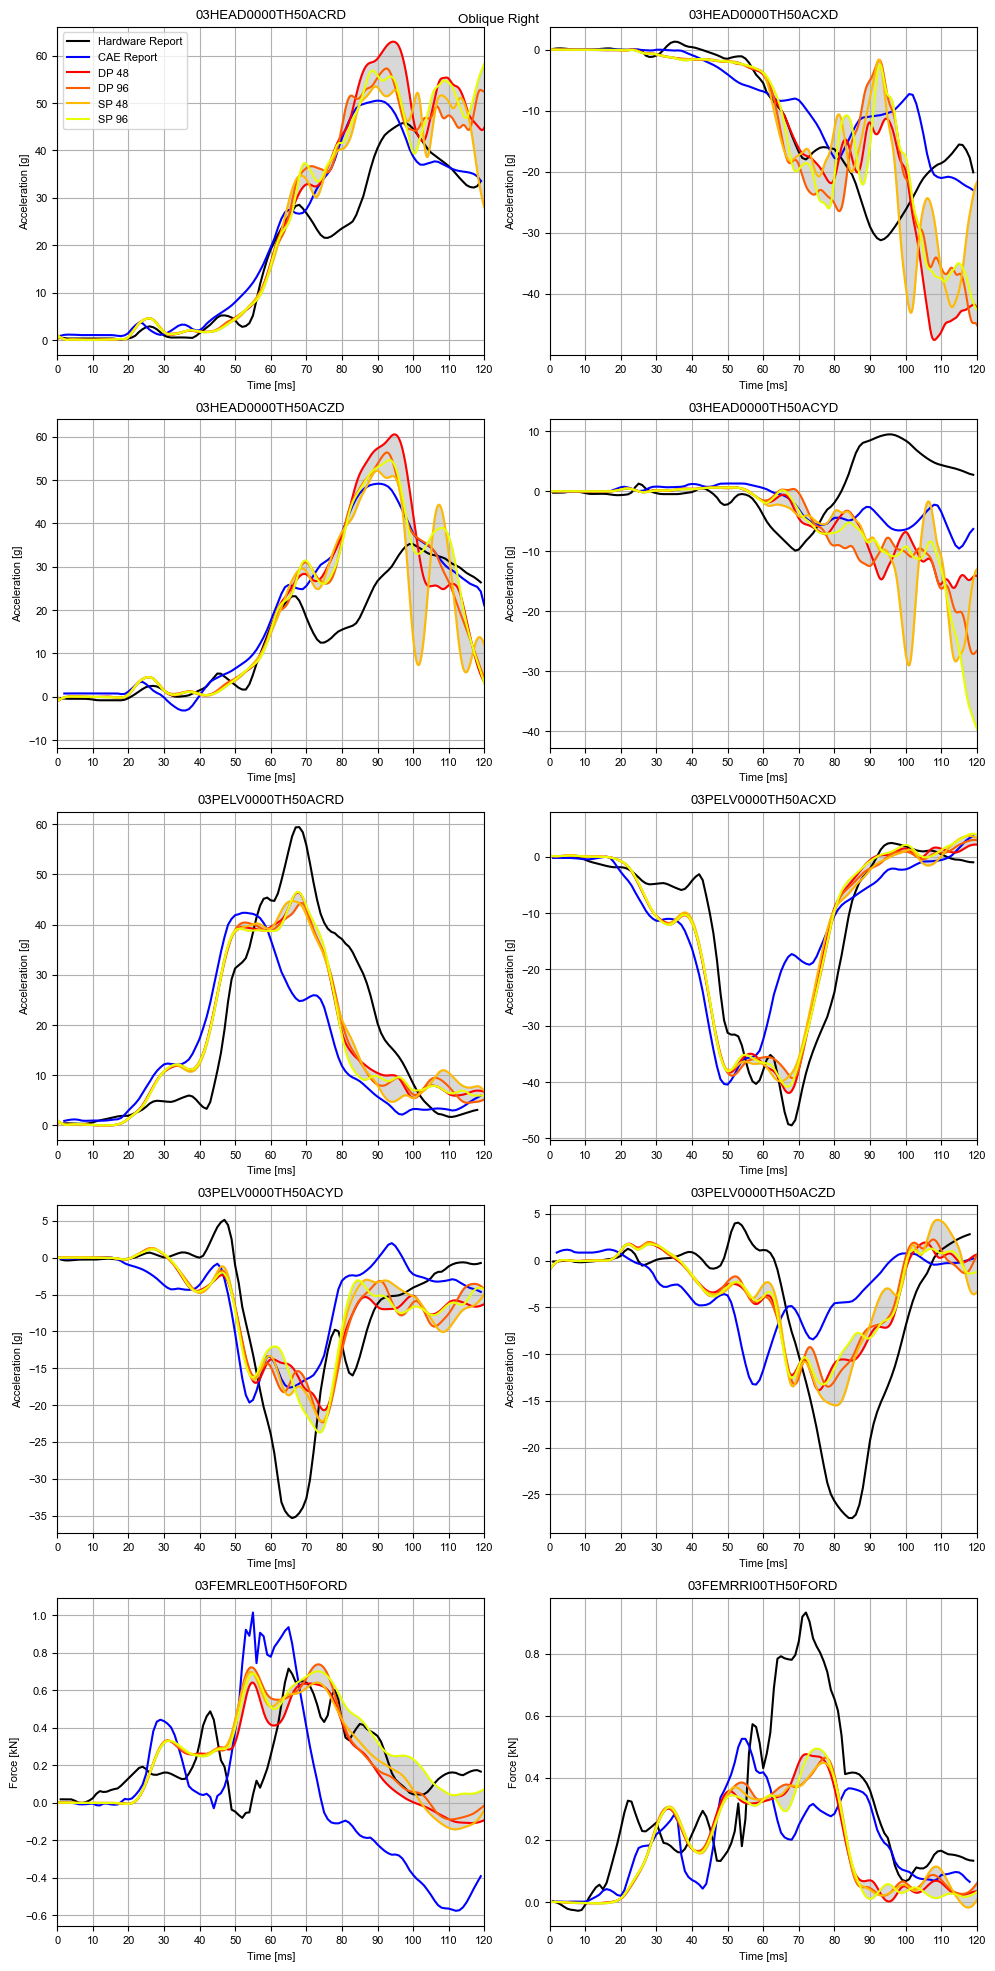

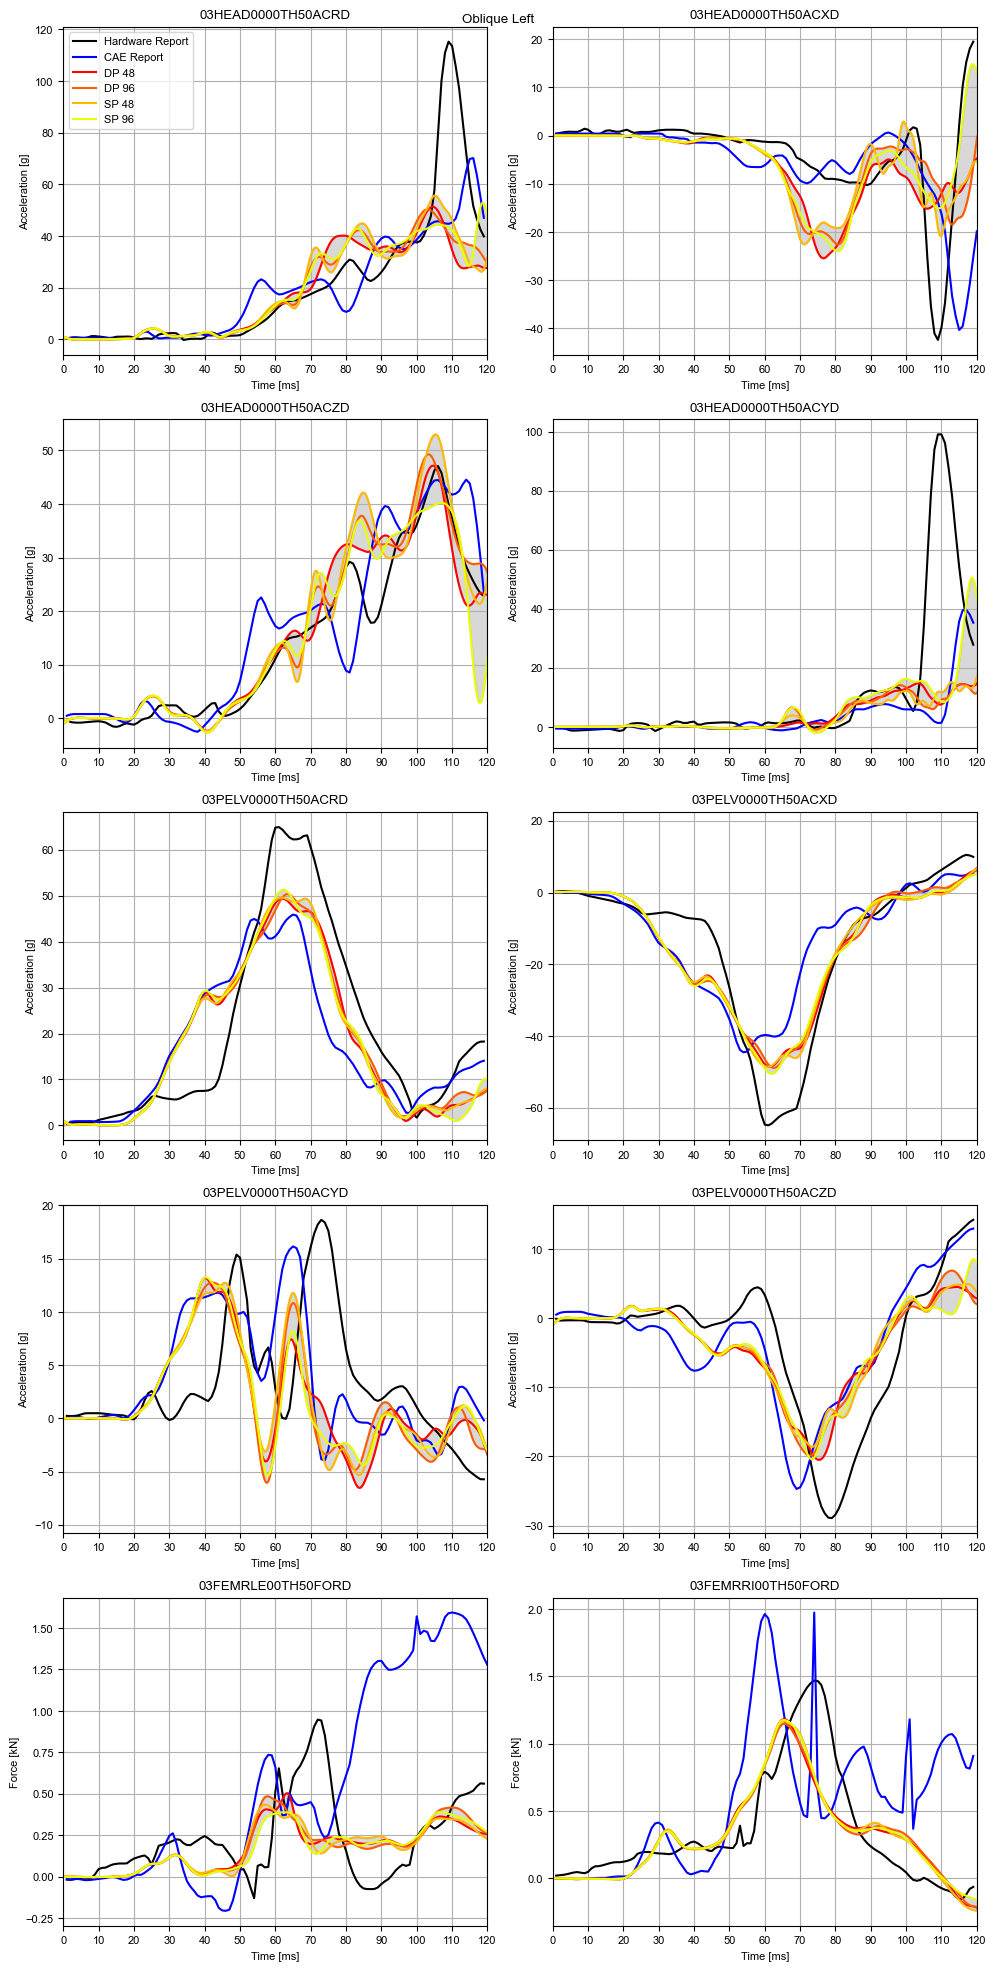

In [8]:
for occ in occupant_channels.keys():
    for case in ["Oblique Right", "Oblique Left"]:
        fig, axs = plt.subplot_mosaic(occupant_channels[occ], figsize=(10, 20))
        fig.suptitle(case)
        for channel in axs.keys():
            # add report data
            report = db_report[db_report["Channel"].eq(channel) & db_report["Case"].eq(case)]
            for i, ass in enumerate(["Hardware Report", "CAE Report"]):
                report2 = report[report["Source"].eq(ass)]
                flip = -1 if channel.endswith("HEAD0000TH50ACXD") or channel.endswith("HEAD0000TH50ACZD") else 1

                axs[channel].plot(report2["Time"], report2["Value"] * flip, label=ass, c=cs_report[i])

            # set flip
            flip = 1

            # add CAE data
            cae = db_cae[db_cae["Channel"].eq(channel) & db_cae["Case"].eq(case)]
            cae["Value"] *= flip

            # plot single
            for i, setting in enumerate(sorted(cae["Assembly"].unique())):
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                axs[channel].plot(cae2["Time"], cae2["Value"], label=setting, c=cs[i])

            # min max corridor
            time = sorted(cae["Time"].unique())
            mini = [cae["Value"][cae["Time"].eq(t)].min() for t in time]
            maxi = [cae["Value"][cae["Time"].eq(t)].max() for t in time]
            axs[channel].fill_between(time, mini, maxi, color="gray", alpha=0.3)

            # format
            axs[channel].set_xlim([0, 120])
            axs[channel].set_xticks(np.arange(0, 121, 10))
            axs[channel].set_title(channel)
            axs[channel].set_xlabel("Time [ms]")
            axs[channel].set_ylabel(units[channel[-4:-2]])
            axs[channel].grid()
            axs[occupant_channels[occ][0][0]].legend()

        store(fig=fig, region="BODY", case=case, side=occ)
        # break
    # break